<a href="https://colab.research.google.com/github/lwallac2/Bank-Marketing/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images

#Reading in the data as adult dataframe
df = pd.read_csv("https://raw.githubusercontent.com/lwallac2/Bank-Marketing/main/bank-additional.csv", sep=';')

#Verifying that we can see the data
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
df1 = df
df1.day_of_week.replace('mon',1, inplace=True)
df1.day_of_week.replace('tue',2, inplace=True)
df1.day_of_week.replace('wed',3, inplace=True)
df1.day_of_week.replace('thu',4, inplace=True)
df1.day_of_week.replace('fri',5, inplace=True)

df1.job.replace('admin.',1, inplace=True)
df1.job.replace('blue-collar',2, inplace=True)
df1.job.replace('entrepreneur',3, inplace=True)
df1.job.replace('housemaid',4, inplace=True)
df1.job.replace('management',5, inplace=True)
df1.job.replace('retired',6, inplace=True)
df1.job.replace('self-employed',7, inplace=True)
df1.job.replace('services',8, inplace=True)
df1.job.replace('student',9, inplace=True)
df1.job.replace('technician',10, inplace=True)
df1.job.replace('unemployed',11, inplace=True)
df1.job.replace('unknown',12, inplace=True)

df1.marital.replace('divorced',1, inplace=True)
df1.marital.replace('married',2, inplace=True)
df1.marital.replace('single',3, inplace=True)
df1.marital.replace('unknown',4, inplace=True)


df1.education.replace('basic.4y',1, inplace=True)
df1.education.replace('basic.6y',2, inplace=True)
df1.education.replace('basic.9y',3, inplace=True)
df1.education.replace('high.school',4, inplace=True)
df1.education.replace('illiterate',5, inplace=True)
df1.education.replace('professional.course',6, inplace=True)
df1.education.replace('university.degree',7, inplace=True)
df1.education.replace('unknown',8, inplace=True)

df1.default.replace('no',0, inplace=True)
df1.default.replace('yes',1, inplace=True)
df1.default.replace('unknown',2, inplace=True)

df1.housing.replace('no',0, inplace=True)
df1.housing.replace('yes',1, inplace=True)
df1.housing.replace('unknown',2, inplace=True)

df1.loan.replace('no',0, inplace=True)
df1.loan.replace('yes',1, inplace=True)
df1.loan.replace('unknown',2, inplace=True)

df1.contact.replace('cellular',0, inplace=True)
df1.contact.replace('telephone',1, inplace=True)

df1.month.replace('jan',1, inplace=True)
df1.month.replace('feb',2, inplace=True)
df1.month.replace('mar',3, inplace=True)
df1.month.replace('apr',4, inplace=True)
df1.month.replace('may',5, inplace=True)
df1.month.replace('jun',6, inplace=True)
df1.month.replace('jul',7, inplace=True)
df1.month.replace('aug',8, inplace=True)
df1.month.replace('sep',9, inplace=True)
df1.month.replace('oct',10, inplace=True)
df1.month.replace('nov',11, inplace=True)
df1.month.replace('dec',12, inplace=True)


df1.poutcome.replace('failure',1, inplace=True)
df1.poutcome.replace('nonexistent',2, inplace=True)
df1.poutcome.replace('success',3, inplace=True)

df1.y.replace('no',0, inplace=True)
df1.y.replace('yes',1, inplace=True)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,2,2,3,0,1,0,0,5,5,487,2,999,0,2,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,8,3,4,0,0,0,1,5,5,346,4,999,0,2,1.1,93.994,-36.4,4.855,5191.0,0
2,25,8,2,4,0,1,0,1,6,3,227,1,999,0,2,1.4,94.465,-41.8,4.962,5228.1,0
3,38,8,2,3,0,2,2,1,6,5,17,3,999,0,2,1.4,94.465,-41.8,4.959,5228.1,0
4,47,1,2,7,0,1,0,0,11,1,58,1,999,0,2,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,2,2,0,1,1,0,7,4,53,1,999,0,2,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,1,2,4,0,1,0,1,7,5,219,1,999,0,2,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,9,3,4,0,0,0,0,5,1,64,2,999,1,1,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,1,2,4,0,0,0,0,8,5,528,1,999,0,2,1.4,93.444,-36.1,4.966,5228.1,0


### Question 1

My dependent variable is going to be the y variable because that is the ultimate goal of my dataset. Which is has a client subscribed to a term deposit. So it ultimately would be very helpful to see which independent variables matter in resulting in clients subscribing to a term deposit, which is part of my dataset's overall question. 

In [ ]:
corr = df.corr()
corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.014618,-0.393795,-0.125520,0.161767,-0.010624,-0.011510,0.012700,0.048973,-0.029597,0.041299,-0.014169,-0.043425,0.050931,0.012975,-0.019192,-0.000482,0.098135,-0.015033,-0.041936,0.060374
job,0.014618,1.000000,0.013616,0.134717,-0.041866,0.015189,0.014146,-0.011981,0.025656,-0.004973,-0.016325,0.002553,-0.007936,0.024140,-0.020159,-0.021355,-0.004887,0.039656,-0.019559,-0.033605,0.026725
marital,-0.393795,0.013616,1.000000,0.104367,-0.082082,0.002870,-0.004167,-0.067432,-0.000650,0.026254,-0.005602,0.003015,-0.040722,0.040098,0.001310,-0.069164,-0.046708,-0.020724,-0.079226,-0.075167,0.043833
education,-0.125520,0.134717,0.104367,1.000000,-0.200707,0.004997,-0.042974,-0.116686,0.113167,0.018663,0.000016,0.015626,-0.060828,0.045926,0.029832,-0.057203,-0.086454,0.112925,-0.048882,-0.062012,0.067316
default,0.161767,-0.041866,-0.082082,-0.200707,1.000000,-0.003664,0.013526,0.150786,-0.109991,-0.013154,-0.019973,0.021312,0.089491,-0.093252,0.002240,0.184505,0.162369,0.021680,0.176782,0.167704,-0.076492
housing,-0.010624,0.015189,0.002870,0.004997,-0.003664,1.000000,0.309495,-0.058299,0.026296,0.004361,-0.014635,-0.015565,-0.019355,0.035533,-0.006411,-0.044108,-0.075911,-0.022149,-0.043059,-0.023166,-0.004497
loan,-0.011510,0.014146,-0.004167,-0.042974,0.013526,0.309495,1.000000,0.012332,-0.005729,0.026510,-0.019489,-0.017222,0.005344,0.010028,-0.005188,0.009226,-0.003921,0.008428,0.012766,0.018350,-0.016318
contact,0.012700,-0.011981,-0.067432,-0.116686,0.150786,-0.058299,0.012332,1.000000,-0.344737,-0.004242,-0.028185,0.085654,0.120670,-0.215464,0.129369,0.383405,0.574452,0.252035,0.390313,0.261496,-0.137401
month,0.048973,0.025656,-0.000650,0.113167,-0.109991,0.026296,-0.005729,-0.344737,1.000000,-0.013289,-0.017243,-0.039843,-0.090636,0.067166,0.032714,0.035404,-0.149118,0.238255,0.134545,0.093692,0.034923
day_of_week,-0.029597,-0.004973,0.026254,0.018663,-0.013154,0.004361,0.026510,-0.004242,-0.013289,1.000000,0.012801,-0.004609,0.012509,-0.004291,-0.016049,0.006167,-0.004082,-0.001457,0.007796,0.017280,-0.004428


## Question 2

It appears that emp.var.rate is very much correlated to cons.price.idx, euribor3m, and nr.employed. As they have correlation values of .75,.97, and   .89 which is very strong positive relationships. 

In [ ]:
X = df['duration']
y = df['y']
X = sm.add_constant(X)
df.mod1 = sm.OLS(y, X).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
df.mod1_summary = df.mod1.summary()
print(df.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     874.5
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.90e-174
Time:                        17:24:03   Log-Likelihood:                -653.69
No. Observations:                4119   AIC:                             1311.
Df Residuals:                    4117   BIC:                             1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0223      0.006     -3.552      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Question 3

I don't think a simple linear regression is acceptable to use in predicting 
future values for this equation. 




In [ ]:
# Let's use the three "big" predictor variables from above

X = df[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] # Now we have values from three different independent attributes stored in X
y = df['y'] # This is, again, our dependent attribute
print(X) # This is the content of our X variable

      age  job  marital  ...  cons.conf.idx  euribor3m  nr.employed
0      30    2        2  ...          -46.2      1.313       5099.1
1      39    8        3  ...          -36.4      4.855       5191.0
2      25    8        2  ...          -41.8      4.962       5228.1
3      38    8        2  ...          -41.8      4.959       5228.1
4      47    1        2  ...          -42.0      4.191       5195.8
...   ...  ...      ...  ...            ...        ...          ...
4114   30    1        2  ...          -42.7      4.958       5228.1
4115   39    1        2  ...          -42.7      4.959       5228.1
4116   27    9        3  ...          -46.2      1.354       5099.1
4117   58    1        2  ...          -36.1      4.966       5228.1
4118   34    5        3  ...          -42.0      4.120       5195.8

[4119 rows x 20 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int64  
 2   marital         4119 non-null   int64  
 3   education       4119 non-null   int64  
 4   default         4119 non-null   int64  
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   contact         4119 non-null   int64  
 8   month           4119 non-null   int64  
 9   day_of_week     4119 non-null   int64  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int64  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 20].values

X = np.append(arr = np.ones((4119, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]] # Now we combine all 6 input variables into our first iteration
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:52:43   Log-Likelihood:                -154.98
No. Observations:                4119   AIC:                             352.0
Df Residuals:                    4098   BIC:                             484.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4079      3.170     -5.492      0.0

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 20].values

X = np.append(arr = np.ones((4119, 1)).astype(int), values = X, axis = 1) # We are building our numpy array

X_opt = X[:, [0, 8, 11, 13, 14, 15, 16, 17, 18]] # Now we combine all 6 input variables into our first iteration
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() # Now we set up our regressor function with OLS again as before.
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     277.6
Date:                Thu, 10 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:54:42   Log-Likelihood:                -160.70
No. Observations:                4119   AIC:                             339.4
Df Residuals:                    4110   BIC:                             396.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2261      1.238    -12.297      0.0

## Question 4

This improves the output from the simple linear regression because it is combinging multiple variables, which accounts for more errors that may occur. With them still being significant with all these other variables it shows the true relationship that they have with one another. 

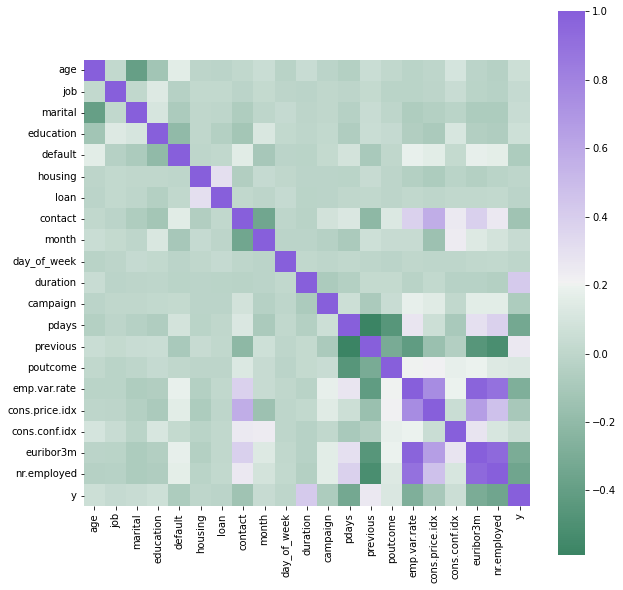

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(150, 275, as_cmap = True), square = True, ax = ax)

In [ ]:
from pandas.io.formats.format import DataFrameRenderer
dfTrain = df[:4000]
dfTest = df[4000:4100]
dfCheck = df[4100:]

In [ ]:
train_y = np.asarray(dfTrain['y']) # We store y in train_y, but as numpy array
train_x = np.asarray(dfTrain.drop('y',1)) # We remove y from the predictors (because it's the output variable)
test_y = np.asarray(dfTest['y']) # See the comments above
test_x = np.asarray(dfTest.drop('y',1))
train_x 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


array([[ 3.0000e+01,  2.0000e+00,  2.0000e+00, ..., -4.6200e+01,
         1.3130e+00,  5.0991e+03],
       [ 3.9000e+01,  8.0000e+00,  3.0000e+00, ..., -3.6400e+01,
         4.8550e+00,  5.1910e+03],
       [ 2.5000e+01,  8.0000e+00,  2.0000e+00, ..., -4.1800e+01,
         4.9620e+00,  5.2281e+03],
       ...,
       [ 5.6000e+01,  8.0000e+00,  2.0000e+00, ..., -4.2700e+01,
         4.9620e+00,  5.2281e+03],
       [ 6.6000e+01,  6.0000e+00,  2.0000e+00, ..., -3.4800e+01,
         6.4600e-01,  5.0087e+03],
       [ 3.0000e+01,  8.0000e+00,  3.0000e+00, ..., -4.6200e+01,
         1.2990e+00,  5.0991e+03]])

In [ ]:
means = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0)
 
train_x = (train_x - means)/std
test_x = (test_x - means)/std

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [ ]:
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%")

accuracy =  92.0 %


In [ ]:
pred = model.predict(test_x)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]


In [ ]:
# Let's compare the actual y and the predicted y

realvsmodel = pd.DataFrame(pred,test_y)
realvsmodel = pd.DataFrame({'predicted':pred,'original':test_y})
realvsmodel.head(25)

,predicted,original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## Question 5

My dependent variable was already binary, so the changing to binary did not impact my variable of choice. This output helps prove that my other tests were accurate but the logistic regression shows how accurate it is at 92%. This allows my model to predict correctly the first 24 values exactly. 